# Fundamental of Simulation Methods
**Name**: Maximilian Richter

**Matrikel Number**: 3463789

**Student ID**: hy455

## Problem Set 10: Numerical Hydrodynamics

### 10.1 A Numerical Solution to a Riemann Problem
#### 1. Solve the problem and plot the results

In [40]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("light")
from hll import hll_interface_flux
from hydro_adi_classic import hydro_adi_classic_one_timestep
from hydro_adi_riemann import hydro_adi_riemann_one_timestep

CFL = 0.4
GAMMA = 7.0 / 5.0


def plot_results(x, rho, velocity, pressure):
    # Plot the results
    fig, axs = plt.subplots(3, 1, figsize=(8, 6))

    # Plot rho
    axs[0].plot(x, rho[-1])
    axs[0].set_ylabel("Density")

    # Plot velocity
    axs[1].plot(x, velocity)
    axs[1].set_ylabel("Velocity")

    # Plot pressure
    axs[2].plot(x, pressure)
    axs[2].set_ylabel("Pressure")
    axs[2].set_xlabel("Grid Index")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Plot the result using imshow
    plt.imshow(np.array(rho), aspect="auto", origin="lower", cmap="turbo")
    plt.colorbar(label="Density")

    # Set title and labels
    plt.title("Density Evolution")
    plt.xlabel("Grid Index")
    plt.ylabel("Time Step")

    # Show the plot
    plt.show()


def init_simulation(nx):
    # Define grid
    x = np.linspace(-100, 100, nx)
    dx = x[1] - x[0]

    # Define initial conditions
    rho = np.ones(x.shape) * 10**5
    rho[x > 0] = 1.24 * 10**4

    velocity = np.zeros(x.shape)

    pressure = np.ones(x.shape)
    pressure[x > 0] = 0.1

    energy = pressure / ((GAMMA - 1) * rho)

    # Compute timestep
    c_sound = np.sqrt(GAMMA * pressure / rho)
    dt = CFL * np.min(dx / (c_sound + np.abs(velocity)))

    # Define initial state vector
    U = np.array([rho, rho * velocity, rho * energy])
    return U, x, dx, dt, c_sound

# Initial Conditions

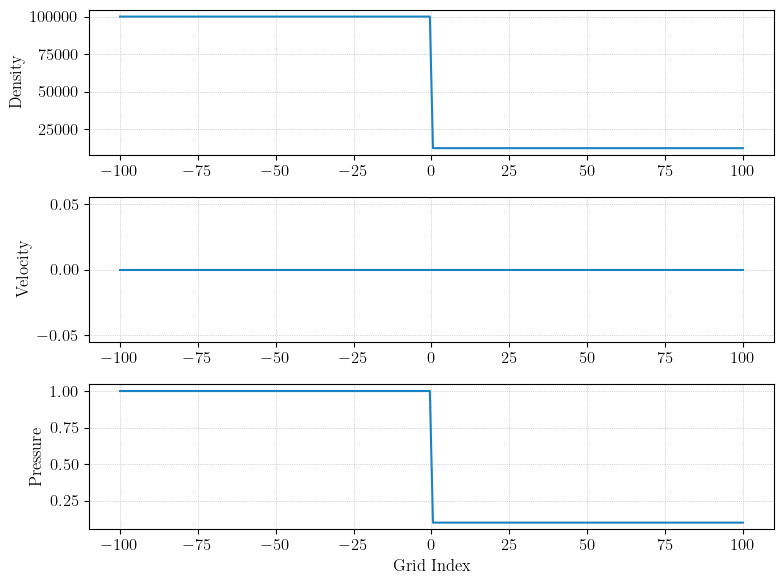

In [41]:
nx = 200

# Get initial conditions
U, x, dx, dt, c_sound = init_simulation(nx)

# Calculate derived quantities
velocity = (U[1] / U[0]).copy()
rho = U[0].copy()
etot = U[2] / rho
ekin = 0.5 * (velocity**2)
eth = etot - ekin
pressure = rho * eth * (GAMMA - 1.0)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# Plot rho
axs[0].plot(x, rho)
axs[0].set_ylabel("Density")

# Plot velocity
axs[1].plot(x, velocity)
axs[1].set_ylabel("Velocity")

# Plot pressure
axs[2].plot(x, pressure)
axs[2].set_ylabel("Pressure")
axs[2].set_xlabel("Grid Index")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Classic Solution

In [42]:
nx = 200

# Get initial conditions
U, x, dx, dt, c_sound = init_simulation(nx)

# Define empty lists to store results
rho_result = []

total_time = 0
output_time = 0

# Evolve the system
while total_time < 10000:
    # Take one time step
    U = hydro_adi_classic_one_timestep(U, dx, dt)

    # Calculate derived quantities
    velocity = (U[1] / U[0]).copy()
    rho = U[0].copy()
    etot = U[2] / rho
    ekin = 0.5 * (velocity**2)
    eth = etot - ekin
    pressure = rho * eth * (GAMMA - 1.0)

    # Store results
    rho_result.append(rho)

    # Update time step
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(velocity)))

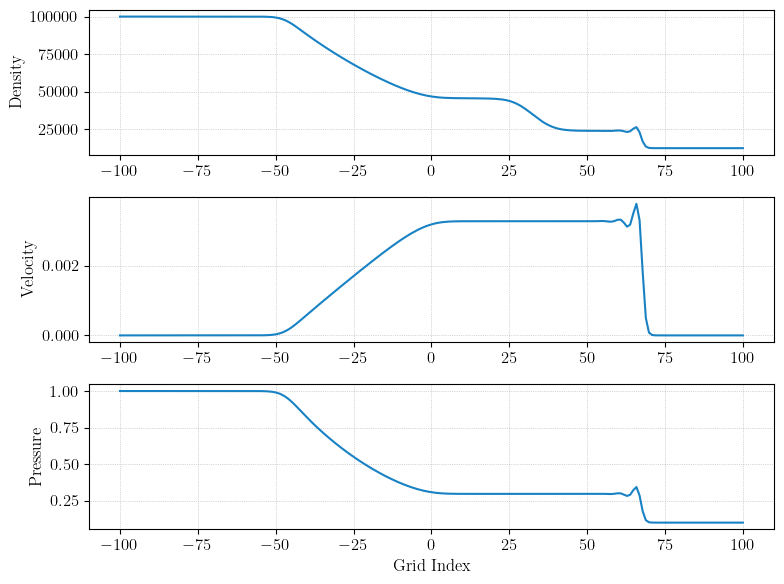

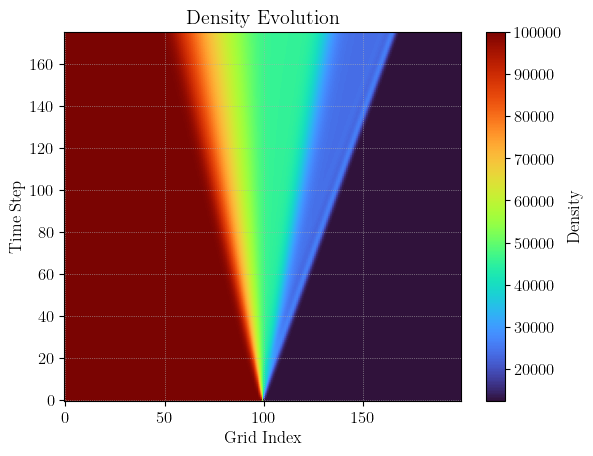

In [43]:
plot_results(x, rho_result, velocity, pressure)

### HLL Riemann Solver

In [44]:
nx = 200

# Get initial conditions
U, x, dx, dt, c_sound = init_simulation(nx)

# Define empty lists to store results
rho_result = []

total_time = 0
output_time = 0

# Evolve the system
while total_time < 10000:
    # Take one time step
    U = hydro_adi_riemann_one_timestep(U, dx, dt)

    # Calculate derived quantities
    velocity = (U[1] / U[0]).copy()
    rho = U[0].copy()
    etot = U[2] / rho
    ekin = 0.5 * (velocity**2)
    eth = etot - ekin
    pressure = rho * eth * (GAMMA - 1.0)

    # Store results
    rho_result.append(rho)

    # Update time step
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(velocity)))

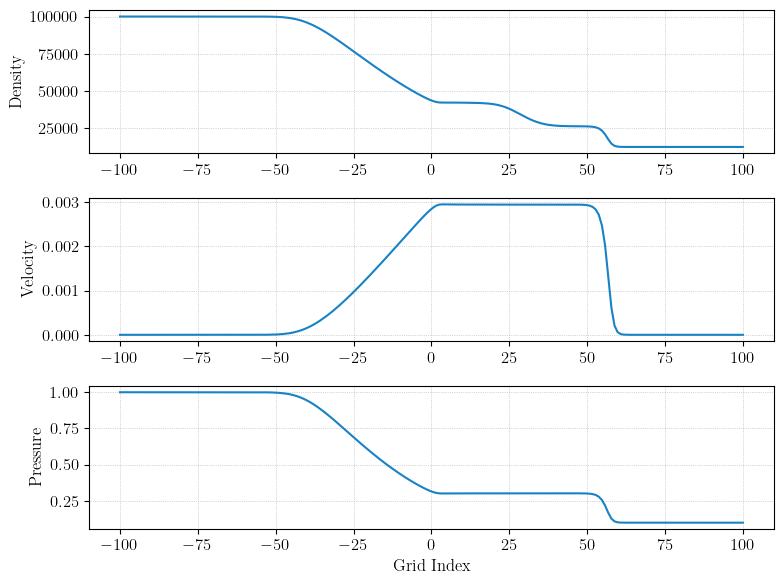

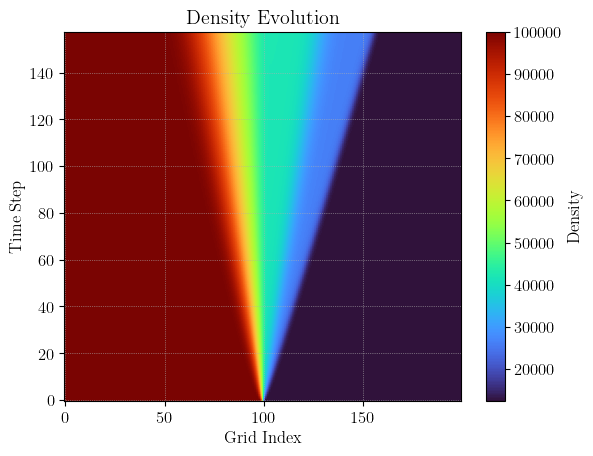

In [45]:
plot_results(x, rho_result, velocity, pressure)

### 2. Compare the results
Both integrations solve the Riemann problem. However, the classical solutions suffers from oscillations at the steep gradients of the shock front. The HLL Riemann solver does not show any oscillations, however, at this resolution the shows are very smoothed out and not really discontinuous as expected. It is also worth to note that in the same time the classical solver has advected the shock a little wider than the HLL Riemann solver.

### 3. Redo with 10x higher resolution

In [46]:
nx = 2000

# Get initial conditions
U, x, dx, dt, c_sound = init_simulation(nx)

# Define empty lists to store results
rho_result = []

total_time = 0
output_time = 0

# Evolve the system
while total_time < 10000:
    # Take one time step
    U = hydro_adi_classic_one_timestep(U, dx, dt)

    # Calculate derived quantities
    velocity = (U[1] / U[0]).copy()
    rho = U[0].copy()
    etot = U[2] / rho
    ekin = 0.5 * (velocity**2)
    eth = etot - ekin
    pressure = rho * eth * (GAMMA - 1.0)

    # Store results
    rho_result.append(rho)

    # Update time step
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(velocity)))

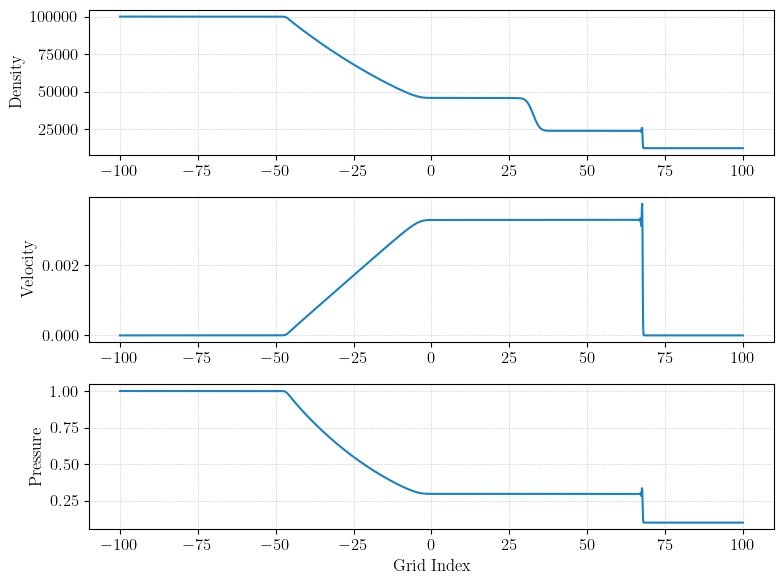

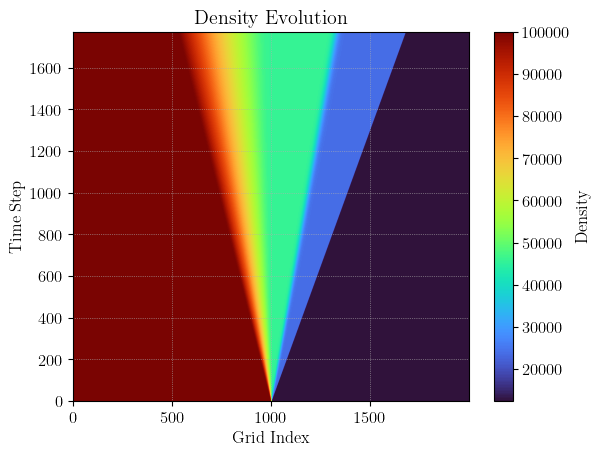

In [47]:
plot_results(x, rho_result, velocity, pressure)

In [48]:
nx = 2000

# Get initial conditions
U, x, dx, dt, c_sound = init_simulation(nx)

# Define empty lists to store results
rho_result = []

total_time = 0
output_time = 0

# Evolve the system
while total_time < 10000:
    # Take one time step
    U = hydro_adi_riemann_one_timestep(U, dx, dt)

    # Calculate derived quantities
    velocity = (U[1] / U[0]).copy()
    rho = U[0].copy()
    etot = U[2] / rho
    ekin = 0.5 * (velocity**2)
    eth = etot - ekin
    pressure = rho * eth * (GAMMA - 1.0)

    # Store results
    rho_result.append(rho)

    # Update time step
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(velocity)))

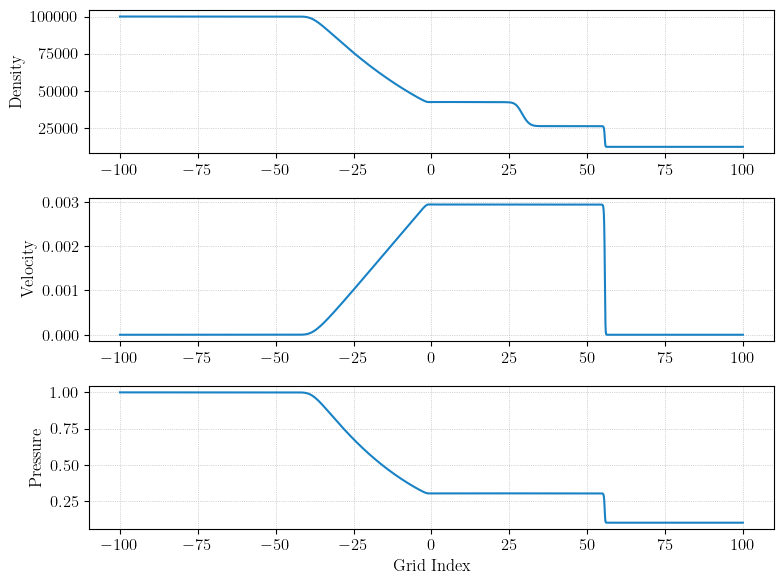

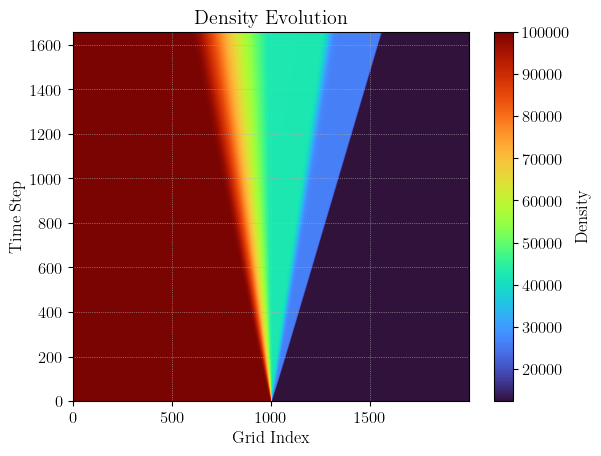

In [49]:
plot_results(x, rho_result, velocity, pressure)

### 4. Explain shape of the solution
The shape is exactly what is expected for the one-dimensional Riemann problem. The initial shock on the density splits up into three distinguished areas. For the last image this would correspond to
- **Contact Discontinuity**: Is roughly from $0$ to $25$ 
- **Expansion Wave**: From $-50$ to $0$
- **Shock Wave**: From $25$ to a little over $50$

# B1. Kelvin-Helmholtz Instability with Athena
Because I was not able to compile the C code on my machine without much effort is used to most recent version of Athena, which is written in C++ and Python. It can be found here https://github.com/PrincetonUniversity/athena. The differences are that the configuration is done with Python and the whole project is now object oriented. This means that the code from Moodle is not working in my case and that i had to compile a template myself. I used the classical Kelvin-Helmholtz solution with a middle fluid and two outer fluids. The instabilities should be the same though. 


<video src="output.mp4" controls title="Title" width=800 height=800></video>

### (a) Simulate Problem with ATHENA

I used the following configuration

```bash
<comment>
problem   = Kelvin-Helmholtz instability
reference = Frank et al., ApJ 460, 777, 1996
configure = --prob=kh

<job>
problem_id = kh-shear  # problem ID: basename of output filenames

<output1>
file_type  = hst       # History data dump
dt         = 0.1      # time increment between outputs

<output2>
file_type  = vtk       # Binary data dump
variable   = prim      # variables to be output
dt         = 0.01       # time increment between outputs

<time>
cfl_number = 0.4       # The Courant, Friedrichs, & Lewy (CFL) Number
nlim       = 100000    # cycle limit
tlim       = 5.0       # time limit
integrator  = vl2      # time integration algorithm
xorder      = 2        # order of spatial reconstruction
ncycle_out  = 1        # interval for stdout summary info

<mesh>
nx1        = 512         # Number of zones in X1-direction
x1min      = -0.5        # minimum value of X1
x1max      =  0.5        # maximum value of X1
ix1_bc     = periodic    # inner-X1 boundary flag
ox1_bc     = periodic    # inner-X1 boundary flag

nx2        = 512        # Number of zones in X2-direction
x2min      = -0.5        # minimum value of X2
x2max      = 0.5         # maximum value of X2
ix2_bc     = reflecting  # inner-X2 boundary flag
ox2_bc     = reflecting  # inner-X2 boundary flag

nx3        = 1           # Number of zones in X3-direction
x3min      = -0.5        # minimum value of X3
x3max      = 0.5         # maximum value of X3
ix3_bc     = periodic    # inner-X3 boundary flag
ox3_bc     = periodic    # inner-X3 boundary flag

<hydro>
iso_sound_speed = 1.0 
gamma           = 1.6666667    # gamma = C_p/C_v

<problem>
iprob = 1
amp   = 0.05
vflow = 0.3
drat = 2
```

/home/max/miniconda3/envs/work/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

Your build of VTK does not have the proper web modules enabled.
These modules are typically enabled by default with the
`-DVTK_GROUP_ENABLE_Web:STRING=WANT` build flag.

Conda users: This is a known issue with the conda-forge VTK feedstock.
See https://github.com/conda-forge/vtk-feedstock/pull/258


Falling back to a static output.
  warnings.warn(


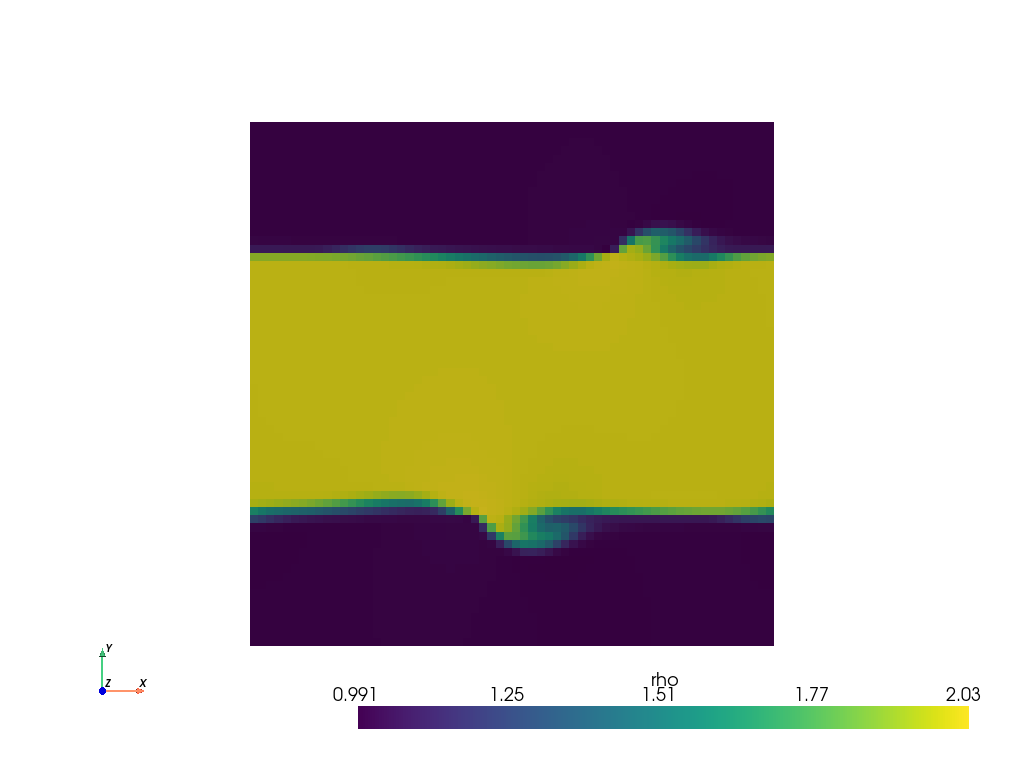

In [36]:
import pyvista as pv
import matplotlib.pyplot as plt

# Load the VTK file
mesh = pv.read('/run/media/max/Data/Simulations/Fluid/work/64/kh-shear.block0.out2.00300.vtk')
mesh.plot(cpos='xy')
# Show the plot
plt.show()


/home/max/miniconda3/envs/work/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

Your build of VTK does not have the proper web modules enabled.
These modules are typically enabled by default with the
`-DVTK_GROUP_ENABLE_Web:STRING=WANT` build flag.

Conda users: This is a known issue with the conda-forge VTK feedstock.
See https://github.com/conda-forge/vtk-feedstock/pull/258


Falling back to a static output.
  warnings.warn(


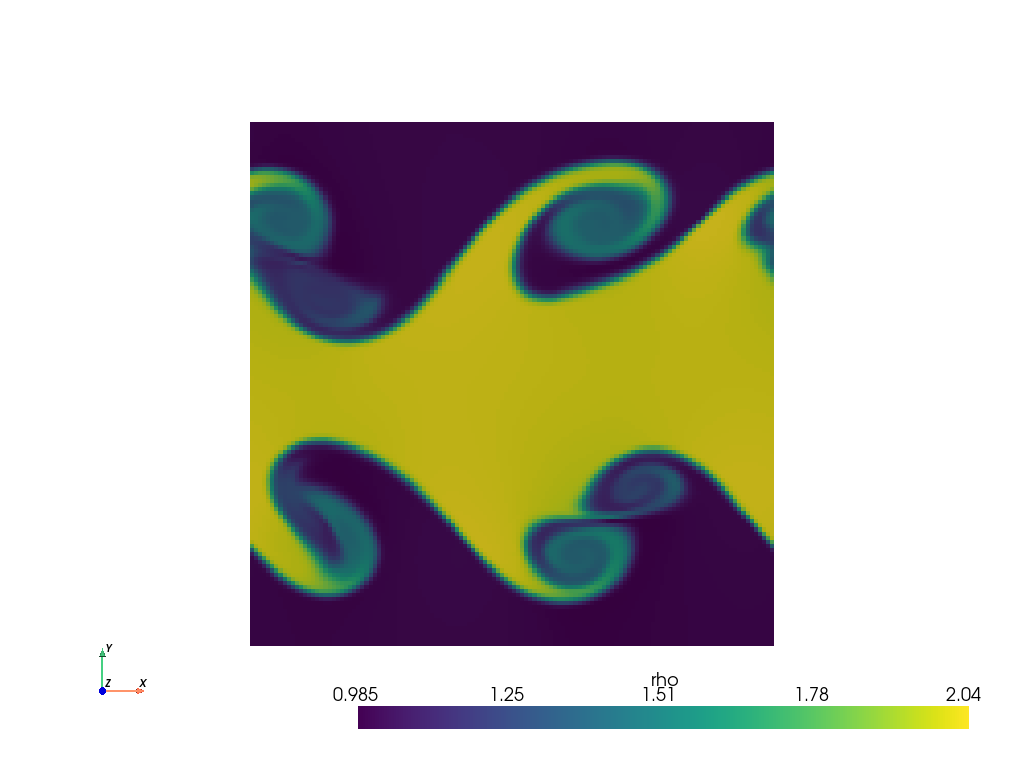

In [37]:
# Load the VTK file
mesh = pv.read('/run/media/max/Data/Simulations/Fluid/work/128/kh-shear.block0.out2.00300.vtk')
mesh.plot(cpos='xy')
# Show the plot
plt.show()

/home/max/miniconda3/envs/work/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

Your build of VTK does not have the proper web modules enabled.
These modules are typically enabled by default with the
`-DVTK_GROUP_ENABLE_Web:STRING=WANT` build flag.

Conda users: This is a known issue with the conda-forge VTK feedstock.
See https://github.com/conda-forge/vtk-feedstock/pull/258


Falling back to a static output.
  warnings.warn(


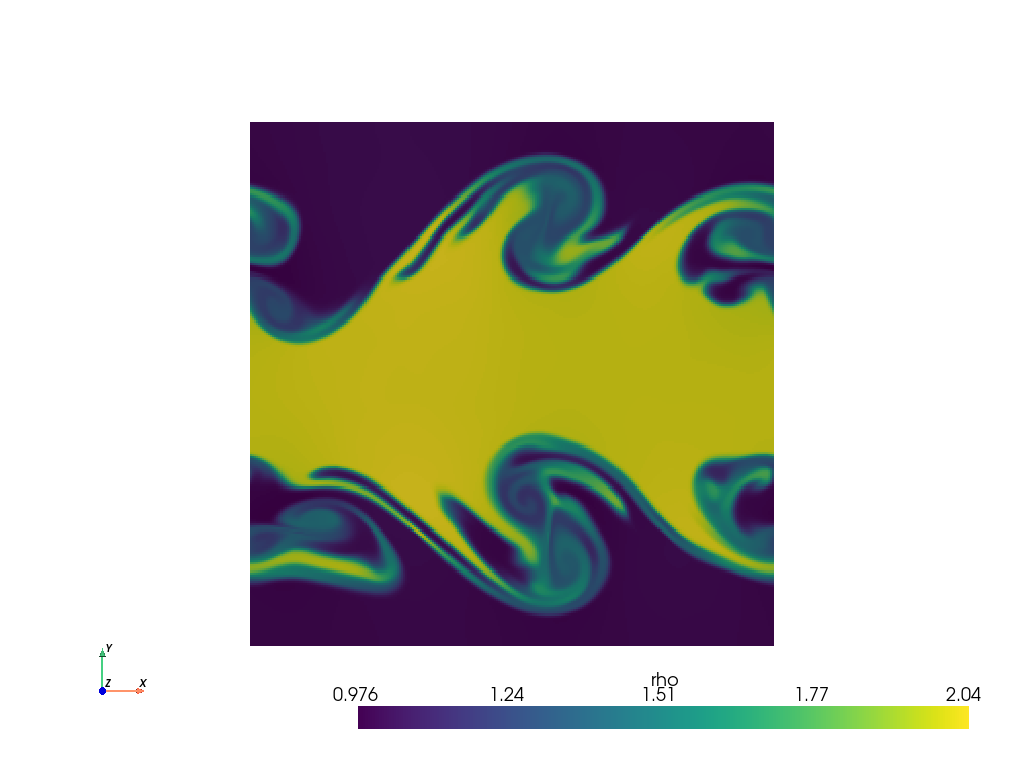

In [38]:
# Load the VTK file
mesh = pv.read('/run/media/max/Data/Simulations/Fluid/work/256/kh-shear.block0.out2.00300.vtk')
mesh.plot(cpos='xy')
# Show the plot
plt.show()

/home/max/miniconda3/envs/work/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

Your build of VTK does not have the proper web modules enabled.
These modules are typically enabled by default with the
`-DVTK_GROUP_ENABLE_Web:STRING=WANT` build flag.

Conda users: This is a known issue with the conda-forge VTK feedstock.
See https://github.com/conda-forge/vtk-feedstock/pull/258


Falling back to a static output.
  warnings.warn(


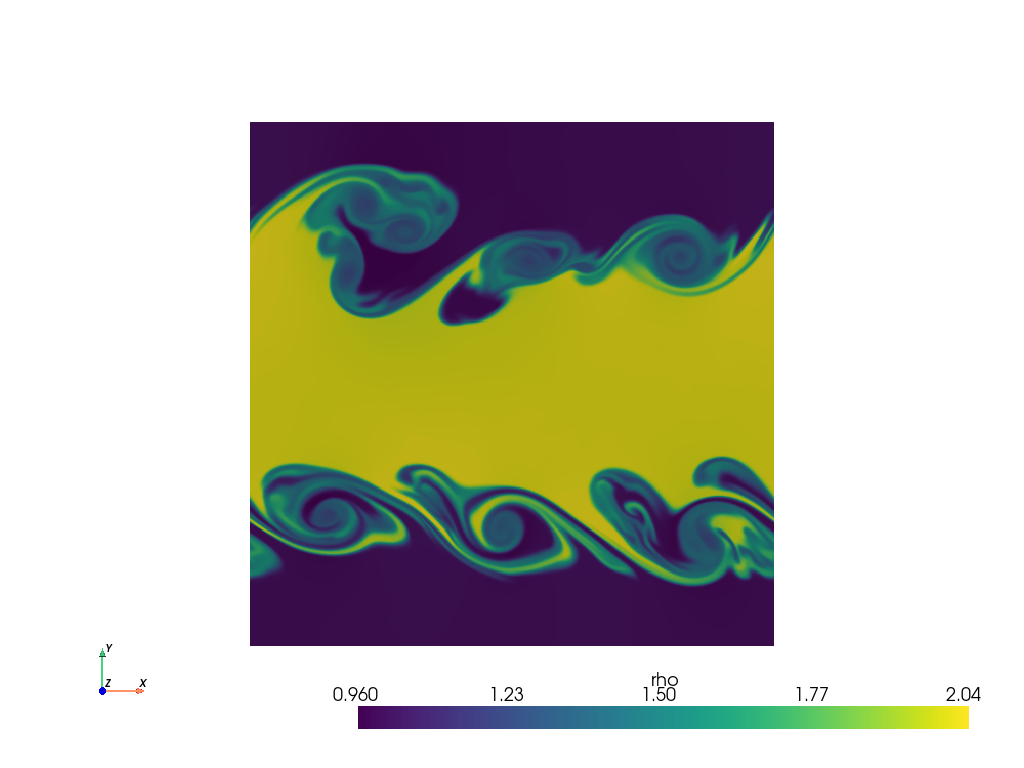

In [39]:
# Load the VTK file
mesh = pv.read('/run/media/max/Data/Simulations/Fluid/work/512/kh-shear.block0.out2.00300.vtk')
mesh.plot(cpos='xy')
# Show the plot
plt.show()

As one can see the low resolution can not resolve the high frequency waves of turbulent fluids. Only large Eddies are forming and they look very smeared out. The higher the resolution the more small Eddies start to form and even smaller eddies start to form on the larger ones. This is an example of the _Enstrophy_ cascades in two-dimensional flows, where energy can also dissipate by former larger and larger vortices.

### (b) Linear growth rate

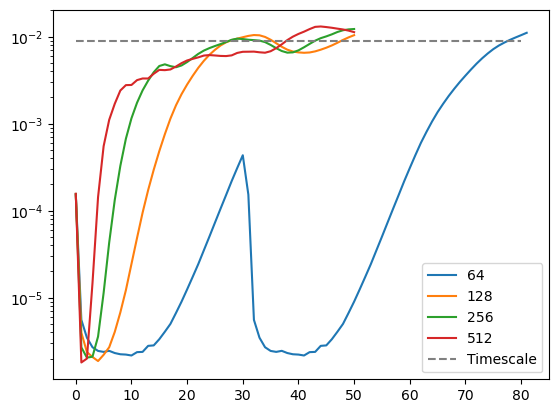

In [55]:
import numpy as np
data = {f"{i}": np.loadtxt(f"/run/media/max/Data/Simulations/Fluid/work/{i}/kh-shear.hst") for i in [64, 128, 256, 512]}

u_1 = 0.3
u_2 = -0.3
rho_1 = 1.0
rho_2 = 2.0

k = 2*(2*np.pi/400)
omega = k*np.abs(u_1 - u_2) * np.sqrt(rho_1*rho_2)/(rho_1 + rho_2)

for i in [64, 128, 256, 512]:
    plt.plot(data[f"{i}"][:,7], label=f"{i}")

plt.hlines(omega, 0, 80,label="Timescale", color="grey", linestyle="--")
plt.yscale('log')
plt.legend()

Initially the growth rate is slower than expected because it takes a while for the system to develop enough instability for the waves to grow exponentially. The higher the resolution the faster the onset of the instability and the resulting turbulence. The later slowdown is because most of the unstable shear layers are gone, and the fluid is more or less completely turbulent, so no perturbations can grow anymore

### (c) Repeat with constant velocity of $\Delta u=5.0$ everywhere

/home/max/miniconda3/envs/work/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

Your build of VTK does not have the proper web modules enabled.
These modules are typically enabled by default with the
`-DVTK_GROUP_ENABLE_Web:STRING=WANT` build flag.

Conda users: This is a known issue with the conda-forge VTK feedstock.
See https://github.com/conda-forge/vtk-feedstock/pull/258


Falling back to a static output.
  warnings.warn(


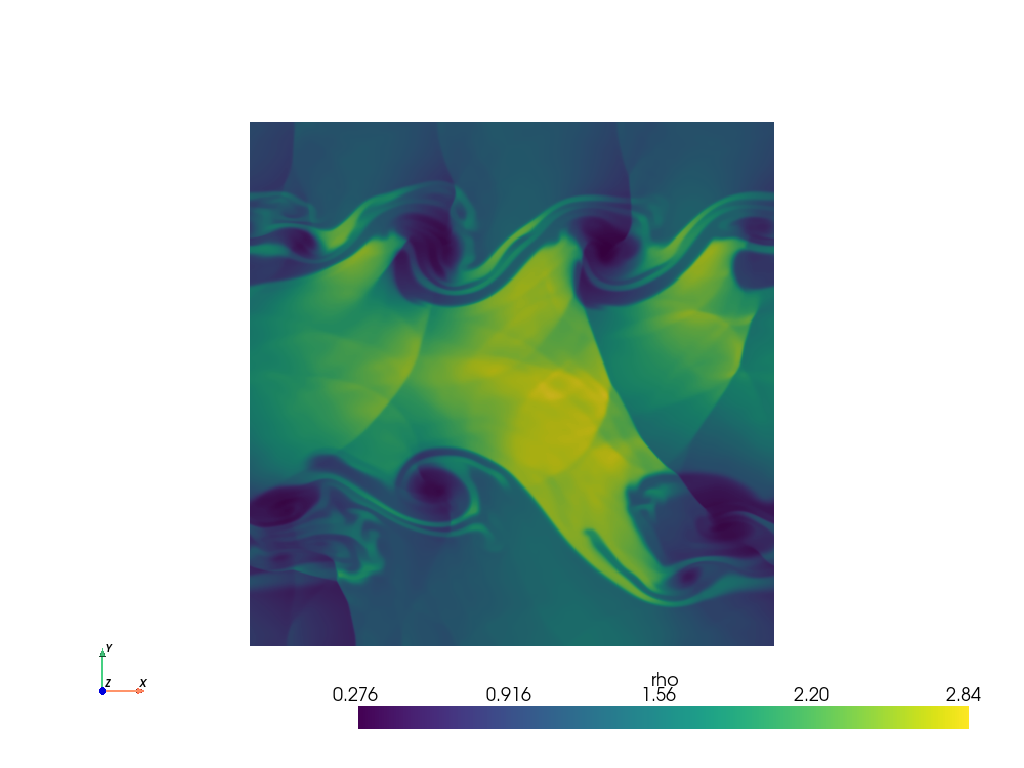

In [58]:
# Load the VTK file
mesh = pv.read('/run/media/max/Data/Simulations/Fluid/work/512-added-velocity/kh-shear.block0.out2.00150.vtk')
mesh.plot(cpos='xy')
# Show the plot
plt.show()

It seems that shock fronts are developing 